In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

from final_project.loader import get_df
from final_project import builder
from final_project import models
from final_project.models import ModelENUM
from pathlib import Path
from sklearn.model_selection import train_test_split

In [2]:
blah = ModelENUM.LR
test = ModelENUM.LR

print(blah == ModelENUM.LR)
print(blah is ModelENUM.LR)
print(blah is test)

True
True
True


In [3]:
df = get_df(file='Flights_2018_1.csv')
df = builder.encodeFrame(builder.columnManager(df))

x = df.drop(columns=['ArrDel15'])
y = df[['ArrDel15']]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=150)

In [4]:
lr_pipeline = models.get_pipeline(ModelENUM.LR)
param_grid = [
    # log_reg.get_lr_param(solver="liblinear", penalty=["l1", "l2"], c_list=[1, 10]),
    # log_reg.get_lr_param(solver="saga", penalty=["l2", "elasticnet"], c_list=[1,10]),
    models.get_lr_param(penalty=["l1"], c_list=[.1], max_iter=[1000]),
    # models.get_lr_param(solver="saga", penalty=["l2"], c_list=[.1]),
]
grid_search = models.get_grid_search_cv(
    pipeline=lr_pipeline, param_grid=param_grid, cv=3, n_jobs=20
)

In [5]:
logreg_model = grid_search.fit(x_train, y_train.to_numpy().ravel())

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV 2/3; 1/1] START lr__C=0.1, lr__max_iter=1000, lr__penalty=l1, lr__solver=liblinear[CV 1/3; 1/1] START lr__C=0.1, lr__max_iter=1000, lr__penalty=l1, lr__solver=liblinear[CV 3/3; 1/1] START lr__C=0.1, lr__max_iter=1000, lr__penalty=l1, lr__solver=liblinear




/home/drumblum/Northeastern/cs6140/CS6140-final-project/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/3; 1/1] END lr__C=0.1, lr__max_iter=1000, lr__penalty=l1, lr__solver=liblinear;, score=1.000 total time= 1.7min


/home/drumblum/Northeastern/cs6140/CS6140-final-project/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 1/3; 1/1] END lr__C=0.1, lr__max_iter=1000, lr__penalty=l1, lr__solver=liblinear;, score=1.000 total time= 1.7min


/home/drumblum/Northeastern/cs6140/CS6140-final-project/.venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/3; 1/1] END lr__C=0.1, lr__max_iter=1000, lr__penalty=l1, lr__solver=liblinear;, score=1.000 total time= 1.7min


In [6]:
params = models.get_best_params(ModelENUM.LR, logreg_model)
print(params)
models.save_model(ModelENUM.LR, logreg_model)

{'solver': 'liblinear', 'penalty': 'l1', 'C': 0.1}


In [9]:
import joblib
new_model = joblib.load(Path.cwd().parent / "models" / "LR_liblinear_l1_C0.1.pkl")
y_pred = new_model.predict(x_test)
y_pred_og = logreg_model.predict(x_test)
print(y_pred)
print(y_pred_og)
print(new_model.score(x_test, y_test))

[0. 0. 1. ... 0. 0. 0.]
[0. 0. 1. ... 0. 0. 0.]
1.0


In [10]:
from sklearn.metrics import log_loss, roc_auc_score, roc_curve, auc
logloss = log_loss(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
print(logloss)
print(auc_roc)

2.2204460492503136e-16
1.0


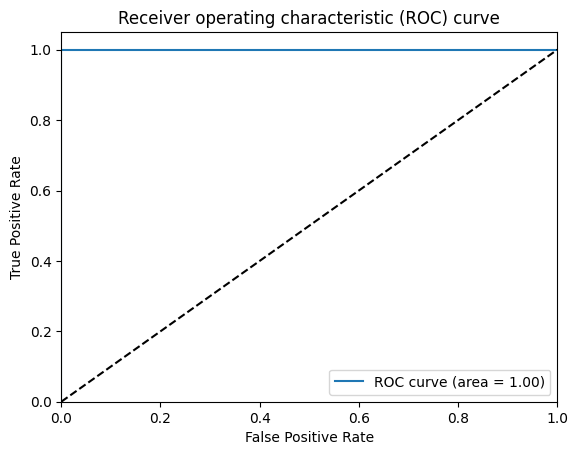

In [11]:
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # plot random curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
svm_pipeline = models.get_pipeline(ModelENUM.SVM)
param_grid = [
    models.get_svm_param(gamma=['scale'], c_list=[0.1], coef0=[0.1], kernel=['poly'])
]
grid_search = models.get_grid_search_cv(
    pipeline=svm_pipeline, param_grid=param_grid, cv=3, n_jobs=20
)

In [ ]:
svm_model = grid_search.fit(x_train, y_train.to_numpy().ravel())